<a href="https://colab.research.google.com/github/MarkovMarkowitz/MarkovMarkowitz/blob/main/ON3_AnalyzeAndReplacePortfolio_v7_CASH_IGNORED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:


# @title Markov Markowitz Company / Portfolio Analyzer v3 { vertical-output: true }
# @markdown ---
# @markdown Input parameters for asset selection


SHOPPING_LIST_FILE = "ShoppingList.csv" # @param {type:"string"}
YAHOO_PF_FILE = "HANDAN_OLD_15.12.2023.csv" # @param {type:"string"}

OFFSET = 0 # @param {type:"number"}
LOOKBACK = 23 # @param {type:"number"}
PURSE = 250000  # @param {type: "number"}
EXCHANGE = "bist30"  # @param ['bist30', 'bist100', 'dow30', 'sp500']
# @markdown ---

BEST_PORTFOLIO_FILE = f"Best_PF_For_{EXCHANGE}.csv"



In [58]:
from datetime import date, timedelta, datetime
import yfinance as yf

offset = OFFSET
look_back = LOOKBACK
CURRENT_T2 = PURSE
exchange = EXCHANGE

current_date = date.today().isoformat()
days_before = (date.today() - timedelta(days=look_back+offset)).isoformat()
days_after =  (date.today() + timedelta(days=1-offset)).isoformat()

print("\nCurrent Date: ",current_date)
print(f"{look_back+offset} days before current date: ",days_before)
print(f"{offset} days before current date: ",days_after)

STEP = 0
CHART = 0
dateStart = days_before
START_DATE = dateStart
END_DATE   = days_after
START_DATE, END_DATE
start_time = datetime.now()


Current Date:  2023-12-15
23 days before current date:  2023-11-22
0 days before current date:  2023-12-16


In [59]:
!pip install pyfolio
import pandas as pd
import numpy as np
import pyfolio as py
import io
from google.colab import files



## Special Eyes-Only Report on
# **Individual Portfolio Analysis and Further Suggestions**
#### Report written by **Markov Markowitz Company**
#### Report issued on **27.08.2023**

Any comments should be sent to: info@markovmarkowitz.com


# Step 1: Analysis of present portfolio

Dear Customer,

Per your request, we analysed your present portfolio, as of **27.08.2023** as follows:

In [60]:
yahoo_pf_file = YAHOO_PF_FILE
best_pf_file = BEST_PORTFOLIO_FILE
exchange = EXCHANGE
shopping_list_file = SHOPPING_LIST_FILE


print("Selected = ", BEST_PORTFOLIO_FILE, EXCHANGE, SHOPPING_LIST_FILE, YAHOO_PF_FILE)

Selected =  Best_PF_For_bist30.csv bist30 ShoppingList.csv HANDAN_OLD_15.12.2023.csv


In [61]:
# show current directory
import os
from pathlib import Path
from IPython.display import display
from PIL import Image

from google.colab import files


def LoadFile(file):
  my_file = Path(f"/content/{file}")
  if my_file.is_file():
    print(f"File {file} is present")
  else:
    print(f"Please upload {file} to be analysed:")
    print(70*'=')
    data = files.upload_file(file)
    display(data)

LoadFile(yahoo_pf_file)
MYPF = pd.DataFrame(pd.read_csv(yahoo_pf_file))

LoadFile(best_pf_file)




File HANDAN_OLD_15.12.2023.csv is present
File Best_PF_For_bist30.csv is present


In [62]:
MYPF['Purchased Value'] = MYPF['Purchase Price'] * MYPF['Quantity']
MYPF['Market Value'] = MYPF['Current Price'] * MYPF['Quantity']
MYPF['PnL %'] = (MYPF['Market Value'] - MYPF['Purchased Value']) / MYPF['Purchased Value'] *100
MYPF.index = MYPF.Symbol
MYPF

,Symbol,Current Price,Date,Time,Change,Open,High,Low,Volume,Trade Date,Purchase Price,Quantity,Commission,High Limit,Low Limit,Comment,Purchased Value,Market Value,PnL %
Symbol,,,,,,,,,,,,,,,,,,,
TUPRS.IS,TUPRS.IS,151.20,2023/12/15,17:09 TRT,-0.500000,151.60,152.80,149.60,17694777,20230101,99.143,170.0,0.0,NaN,NaN,NaN,16854.310,25704.00,52.506985
SISE.IS,SISE.IS,48.48,2023/12/15,17:09 TRT,1.180000,47.30,48.52,47.24,32914494,20230101,40.552,775.0,0.0,NaN,NaN,NaN,31427.800,37572.00,19.550207
KONTR.IS,KONTR.IS,215.00,2023/12/15,17:09 TRT,1.199997,213.80,219.40,211.90,3839000,20230101,177.608,13.0,0.0,NaN,NaN,NaN,2308.904,2795.00,21.053106
ISCTR.IS,ISCTR.IS,24.38,2023/12/15,17:09 TRT,0.359999,24.02,25.22,23.86,259961751,20230101,17.798,194.0,0.0,NaN,NaN,NaN,3452.812,4729.72,36.981683
FORTE.IS,FORTE.IS,65.10,2023/12/15,17:09 TRT,3.199997,62.90,68.05,62.20,3133263,20230101,12.120,30.0,0.0,NaN,NaN,NaN,363.600,1953.00,437.128713
EKOS.IS,EKOS.IS,36.30,2023/12/15,17:09 TRT,1.939999,35.50,37.78,34.52,5590352,20230101,12.770,18.0,0.0,NaN,NaN,NaN,229.860,653.40,184.259984
BINHO.IS,BINHO.IS,295.00,2023/12/15,17:09 TRT,-15.000000,300.00,322.75,286.00,984103,20230101,125.000,4.0,0.0,NaN,NaN,NaN,500.000,1180.00,136.000000
AGROT.IS,AGROT.IS,12.85,2023/12/15,17:09 TRT,-0.460000,13.33,13.64,12.83,47062930,20230101,5.210,75.0,0.0,NaN,NaN,NaN,390.750,963.75,146.641075
EREGL.IS,EREGL.IS,41.90,2023/12/15,17:09 TRT,2.720001,39.20,41.90,39.04,126967896,20230101,39.023,113.0,0.0,NaN,NaN,NaN,4409.599,4734.70,7.372575


In [63]:
if '$$CASH' in MYPF.columns:
  MYPF.drop(['$$CASH'], axis=0, inplace=True)
MYPF

,Symbol,Current Price,Date,Time,Change,Open,High,Low,Volume,Trade Date,Purchase Price,Quantity,Commission,High Limit,Low Limit,Comment,Purchased Value,Market Value,PnL %
Symbol,,,,,,,,,,,,,,,,,,,
TUPRS.IS,TUPRS.IS,151.20,2023/12/15,17:09 TRT,-0.500000,151.60,152.80,149.60,17694777,20230101,99.143,170.0,0.0,NaN,NaN,NaN,16854.310,25704.00,52.506985
SISE.IS,SISE.IS,48.48,2023/12/15,17:09 TRT,1.180000,47.30,48.52,47.24,32914494,20230101,40.552,775.0,0.0,NaN,NaN,NaN,31427.800,37572.00,19.550207
KONTR.IS,KONTR.IS,215.00,2023/12/15,17:09 TRT,1.199997,213.80,219.40,211.90,3839000,20230101,177.608,13.0,0.0,NaN,NaN,NaN,2308.904,2795.00,21.053106
ISCTR.IS,ISCTR.IS,24.38,2023/12/15,17:09 TRT,0.359999,24.02,25.22,23.86,259961751,20230101,17.798,194.0,0.0,NaN,NaN,NaN,3452.812,4729.72,36.981683
FORTE.IS,FORTE.IS,65.10,2023/12/15,17:09 TRT,3.199997,62.90,68.05,62.20,3133263,20230101,12.120,30.0,0.0,NaN,NaN,NaN,363.600,1953.00,437.128713
EKOS.IS,EKOS.IS,36.30,2023/12/15,17:09 TRT,1.939999,35.50,37.78,34.52,5590352,20230101,12.770,18.0,0.0,NaN,NaN,NaN,229.860,653.40,184.259984
BINHO.IS,BINHO.IS,295.00,2023/12/15,17:09 TRT,-15.000000,300.00,322.75,286.00,984103,20230101,125.000,4.0,0.0,NaN,NaN,NaN,500.000,1180.00,136.000000
AGROT.IS,AGROT.IS,12.85,2023/12/15,17:09 TRT,-0.460000,13.33,13.64,12.83,47062930,20230101,5.210,75.0,0.0,NaN,NaN,NaN,390.750,963.75,146.641075
EREGL.IS,EREGL.IS,41.90,2023/12/15,17:09 TRT,2.720001,39.20,41.90,39.04,126967896,20230101,39.023,113.0,0.0,NaN,NaN,NaN,4409.599,4734.70,7.372575


In [64]:
MYPF['Start PF %'] = np.round((MYPF['Purchased Value'] / MYPF['Purchased Value'].sum()) *100, 5)
MYPF['End PF %'] = np.round((MYPF['Market Value'] / MYPF['Market Value'].sum()) *100, 5)

In [65]:
MYPF.sort_values( by=["Start PF %"], ascending=[False], inplace = True)


In [66]:
MYPF = MYPF[['Quantity','Purchase Price','Purchased Value','Current Price','Market Value',  'Start PF %', 'End PF %', 'PnL %']]

In [67]:
CURRENT_T2 = MYPF['Market Value'].sum()
CURRENT_T2

85613.56999999999

In [68]:
PV = MYPF['Purchased Value'].sum()
FV = MYPF['Market Value'].sum()

MYPF['Purchase Amount'] = np.trunc(MYPF['End PF %']*CURRENT_T2/100)
MYPF['End Quantity'] = np.trunc(MYPF['Purchase Amount'] / MYPF['Current Price'])
MYPF



<ipython-input-68-f0354df3cca1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MYPF['Purchase Amount'] = np.trunc(MYPF['End PF %']*CURRENT_T2/100)
<ipython-input-68-f0354df3cca1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MYPF['End Quantity'] = np.trunc(MYPF['Purchase Amount'] / MYPF['Current Price'])


,Quantity,Purchase Price,Purchased Value,Current Price,Market Value,Start PF %,End PF %,PnL %,Purchase Amount,End Quantity
Symbol,,,,,,,,,,
SISE.IS,775.0,40.552,31427.800,48.48,37572.00,48.25986,43.88557,19.550207,37572.0,775.0
TUPRS.IS,170.0,99.143,16854.310,151.20,25704.00,25.88112,30.02328,52.506985,25704.0,170.0
KCHOL.IS,36.0,144.011,5184.396,148.00,5328.00,7.96105,6.22331,2.769927,5327.0,35.0
EREGL.IS,113.0,39.023,4409.599,41.90,4734.70,6.77129,5.53031,7.372575,4734.0,112.0
ISCTR.IS,194.0,17.798,3452.812,24.38,4729.72,5.30206,5.52450,36.981683,4729.0,193.0
KONTR.IS,13.0,177.608,2308.904,215.00,2795.00,3.54550,3.26467,21.053106,2795.0,13.0
BINHO.IS,4.0,125.000,500.000,295.00,1180.00,0.76779,1.37829,136.000000,1180.0,4.0
AGROT.IS,75.0,5.210,390.750,12.85,963.75,0.60003,1.12570,146.641075,963.0,74.0
FORTE.IS,30.0,12.120,363.600,65.10,1953.00,0.55834,2.28118,437.128713,1952.0,29.0


In [69]:
# prompt: MYPF veri çerçevesi kullanılıyor:

MYPF.head()


,Quantity,Purchase Price,Purchased Value,Current Price,Market Value,Start PF %,End PF %,PnL %,Purchase Amount,End Quantity
Symbol,,,,,,,,,,
SISE.IS,775.0,40.552,31427.800,48.48,37572.00,48.25986,43.88557,19.550207,37572.0,775.0
TUPRS.IS,170.0,99.143,16854.310,151.20,25704.00,25.88112,30.02328,52.506985,25704.0,170.0
KCHOL.IS,36.0,144.011,5184.396,148.00,5328.00,7.96105,6.22331,2.769927,5327.0,35.0
EREGL.IS,113.0,39.023,4409.599,41.90,4734.70,6.77129,5.53031,7.372575,4734.0,112.0
ISCTR.IS,194.0,17.798,3452.812,24.38,4729.72,5.30206,5.52450,36.981683,4729.0,193.0


In [70]:
def DownloadAssetsAndWriteToCSVs(names):
  price_list = []
  print(LENGTH*"*")
  print("Starting Download ...")
  print(LENGTH*"*")
  for tick in names:
    print(f"Downloading {tick}")
    yf_tick = yf.Ticker(tick)
    df = yf_tick.history(interval='1d', auto_adjust=True, start=START_DATE, end=END_DATE, back_adjust = True, rounding=True)
    df.dropna(how='all', inplace=True)
    price_list.append(df)
  print(LENGTH*"*")
  print(LENGTH*"*")

  # Save datafiles to disk

  for i,df in enumerate(price_list):
        df.to_csv(f"{names[i]}.csv")
  print(price_list)



In [71]:
def ConstructPortfolioTimeSeries(portfolio, NEW_DOWNLOAD):

    if NEW_DOWNLOAD:
        DownloadAssetsAndWriteToCSVs(portfolio.index)
    import yfinance as yf
    print(f"Construct Time series...")
    # print(f"portfolio = {portfolio} is input")
    print(70*'=')

    Residue_Cash = CURRENT_T2
    #os.chdir(wd)

    OrderedTable = pd.DataFrame()
    df = pd.DataFrame()
    names = portfolio.index
    #print(names)
    filename = f"{names[0]}.csv"
    #print(filename)

    portfolio['Portfolio_Weights'] = portfolio['End PF %']/100


    df = pd.read_csv(filename) #change 1
    OrderedTable["Date"] = df.iloc[:,0] #change 3
    for tick in names:
      #print(f"Fetching {tick}")
      filename = f"{tick}.csv"
      #filename = f"{names[0]+'.IS'}.csv"
      df = pd.read_csv(filename)
      #df = pd.read_csv(filename, index_col='Date', parse_dates=True, keep_date_col = True, infer_datetime_format=True, dayfirst=True, decimal=",") #change 2
      OrderedTable[f"{tick}"] = df['Close']  # get each ETFs column write inside OrderedTable


    print("Ordered Table: \n",OrderedTable)

    portfolio['InitialPrices'] = OrderedTable.iloc[0,1:].values
    #print(f"\n Initial prices: \n{InitialPrices} \n")

    portfolio['FinalPrices'] = OrderedTable.iloc[-1,1:].values
    #print(f"\n Final prices: {FinalPrices}")

    Update_Capital = Residue_Cash # add the cash not used for stocks

    portfolio['Portfolio_Amounts'] = np.multiply(Update_Capital, portfolio['Portfolio_Weights'] )
    #print(f" Portfolio amounts: \n{Portfolio_Amounts} \n")

    portfolio['Portfolio_Shares'] = np.trunc(portfolio['Portfolio_Amounts'] / portfolio['InitialPrices'] )  # determine shares

    #print(f" Portfolio shares: \n{portfolio['Portfolio_Shares']} ")

    portfolio['Purchased Value'] = portfolio['InitialPrices'] * portfolio['Portfolio_Shares']

    portfolio['Market Value'] = portfolio['FinalPrices'] * portfolio['Portfolio_Shares']
    portfolio['PnL %'] = (portfolio['Market Value'] - portfolio['Purchased Value']) / MYPF['Purchased Value'] *100
    portfolio['Start PF %'] = portfolio['Purchased Value'] / portfolio['Purchased Value'].sum() *100
    portfolio['End PF %'] = portfolio['Market Value'] / portfolio['Market Value'].sum() *100

    portfolio['Market Value'] = pd.to_numeric(portfolio['Market Value']).round(2)
    portfolio['PnL %'] = pd.to_numeric(portfolio['PnL %']).round(2)
    portfolio['Start PF %'] = pd.to_numeric(portfolio['Start PF %']).round(2)
    portfolio['End PF %'] = pd.to_numeric(portfolio['End PF %']).round(2)

    Prices = OrderedTable.iloc[:,1:].values

    FirstPrices = OrderedTable.iloc[0,0:len(names)].values
    FirstPrices

    OrderedTable['PF_Value'] = np.dot(portfolio['Portfolio_Shares'], Prices.T)  # PF_VALUE = dot product of shares and their prices !!!!
    #print(OrderedTable['PF_Value'])

    Residue_Cash = Update_Capital - OrderedTable.PF_Value.iloc[0] # !!!
    print(f" Residue cash: {Residue_Cash} \n")

    OrderedTable['PF_Value'] += Residue_Cash

    Update_Capital = OrderedTable.PF_Value.iloc[-1] # Update_Captial =  value of the PF at the end of every quarter

    #print(f" Portfolio capital at the end of period: {Update_Capital} \n")
    #print(" Ordered Table: \n")

    OrderedTable['pct_change'] = OrderedTable['PF_Value'].pct_change()
    OrderedTable.set_index("Date", inplace = True)
    OrderedTable.index = pd.to_datetime(OrderedTable.index)  # PYFOLIO nun düzgün çalışması icin bu gerekli
    return OrderedTable, portfolio

In [72]:
def ShowTearSheet(OrderedPctChange, which="Current"):
    print(f"Showing Tearsheet of {which} Portfolio...")
    print(70*'=')
    import pyfolio
    print(f"********* PORTFOLIO TEARSHEET *************** ")

    try:
        simple_tear_sheet = pyfolio.create_simple_tear_sheet(OrderedPctChange)
        print("********* end of TEARSHEET **************\n")
        #simple_tear_sheet.savefig(f"Chart_{CHART}_Ret_Tear_sheet.jpg", format='jpg', dpi=300)
        #from IPython.display import Image
        #Image(url=f"Chart_{CHART}_Simple_Tear_sheet.jpg")

    except Exception as e:
        print("Error generating returns tear sheet:", e)
        returns_tear_sheet = None

In [73]:
show_df = pd.DataFrame({"assets":MYPF.index.T, "%": np.round(MYPF['End PF %'],4), "amounts": MYPF['Market Value']})
#show_df = show_df.loc[(show_df["%"]>0)]
show_df = MYPF.sort_values(by=['End PF %'],ascending=False)
show_df



,Quantity,Purchase Price,Purchased Value,Current Price,Market Value,Start PF %,End PF %,PnL %,Purchase Amount,End Quantity
Symbol,,,,,,,,,,
SISE.IS,775.0,40.552,31427.800,48.48,37572.00,48.25986,43.88557,19.550207,37572.0,775.0
TUPRS.IS,170.0,99.143,16854.310,151.20,25704.00,25.88112,30.02328,52.506985,25704.0,170.0
KCHOL.IS,36.0,144.011,5184.396,148.00,5328.00,7.96105,6.22331,2.769927,5327.0,35.0
EREGL.IS,113.0,39.023,4409.599,41.90,4734.70,6.77129,5.53031,7.372575,4734.0,112.0
ISCTR.IS,194.0,17.798,3452.812,24.38,4729.72,5.30206,5.52450,36.981683,4729.0,193.0
KONTR.IS,13.0,177.608,2308.904,215.00,2795.00,3.54550,3.26467,21.053106,2795.0,13.0
FORTE.IS,30.0,12.120,363.600,65.10,1953.00,0.55834,2.28118,437.128713,1952.0,29.0
BINHO.IS,4.0,125.000,500.000,295.00,1180.00,0.76779,1.37829,136.000000,1180.0,4.0
AGROT.IS,75.0,5.210,390.750,12.85,963.75,0.60003,1.12570,146.641075,963.0,74.0


In [74]:
LENGTH = 64
print("Dear Customer, now starting to analyze your current portfolio performance...")
print(LENGTH*"-")
print(LENGTH*"-")

OrderedTimeSeries, IDEAL_PF = ConstructPortfolioTimeSeries(show_df, NEW_DOWNLOAD=True)
OrderedTimeSeries




Dear Customer, now starting to analyze your current portfolio performance...
----------------------------------------------------------------
----------------------------------------------------------------
****************************************************************
Starting Download ...
****************************************************************
****************************************************************
****************************************************************
[                            Open   High    Low  Close    Volume  Dividends  \
Date                                                                         
2023-11-22 00:00:00+03:00  50.40  50.65  49.84  50.15  24473160        0.0   
2023-11-23 00:00:00+03:00  50.15  50.50  49.20  49.20  28695566        0.0   
2023-11-24 00:00:00+03:00  49.18  49.66  48.74  49.36  25946686        0.0   
2023-11-27 00:00:00+03:00  49.50  50.30  49.42  50.00  28682651        0.0   
2023-11-28 00:00:00+03:00  50.00  50.35  4

,SISE.IS,TUPRS.IS,KCHOL.IS,EREGL.IS,ISCTR.IS,KONTR.IS,FORTE.IS,BINHO.IS,AGROT.IS,EKOS.IS,PF_Value,pct_change
Date,,,,,,,,,,,,
2023-11-22 00:00:00+03:00,50.15,155.6,143.7,40.74,21.20,276.00,75.50,166.30,5.73,15.44,85613.57,NaN
2023-11-23 00:00:00+03:00,49.20,149.9,140.5,39.34,21.14,268.00,72.87,182.90,6.30,16.98,83798.23,-0.021204
2023-11-24 00:00:00+03:00,49.36,150.5,141.4,40.46,21.26,266.75,71.43,201.10,6.93,18.67,84462.77,0.007930
2023-11-27 00:00:00+03:00,50.00,156.0,142.4,41.28,22.48,263.00,71.93,221.20,7.62,20.52,86563.13,0.024867
2023-11-28 00:00:00+03:00,50.00,156.0,143.2,41.06,22.16,260.00,73.32,243.30,8.38,22.56,86868.66,0.003530
2023-11-29 00:00:00+03:00,50.65,154.9,143.2,41.22,21.94,253.00,69.99,267.50,9.21,24.80,87393.18,0.006038
2023-11-30 00:00:00+03:00,49.26,152.9,141.5,40.96,21.44,254.75,68.90,294.25,10.13,27.28,86253.73,-0.013038
2023-12-01 00:00:00+03:00,48.92,153.3,142.0,40.60,22.06,249.00,68.46,287.25,11.14,30.00,86346.49,0.001075
2023-12-04 00:00:00+03:00,48.96,154.1,142.8,40.02,22.68,258.25,67.31,315.75,12.25,33.00,87184.76,0.009708


In [75]:
np.mean(OrderedTimeSeries['pct_change'].dropna()) *100

-0.003992147983917652

Showing Tearsheet of HANDAN_OLD_15.12.2023.csv Portfolio...
********* PORTFOLIO TEARSHEET *************** 


/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2023-11-23
End date,2023-12-15
Total months,0
,Backtest
Annual return,-4.5%
Cumulative returns,-0.3%
Annual volatility,27.7%
Sharpe ratio,-0.04
Calmar ratio,-0.80
Stability,0.07
Max drawdown,-5.6%


/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


********* end of TEARSHEET **************



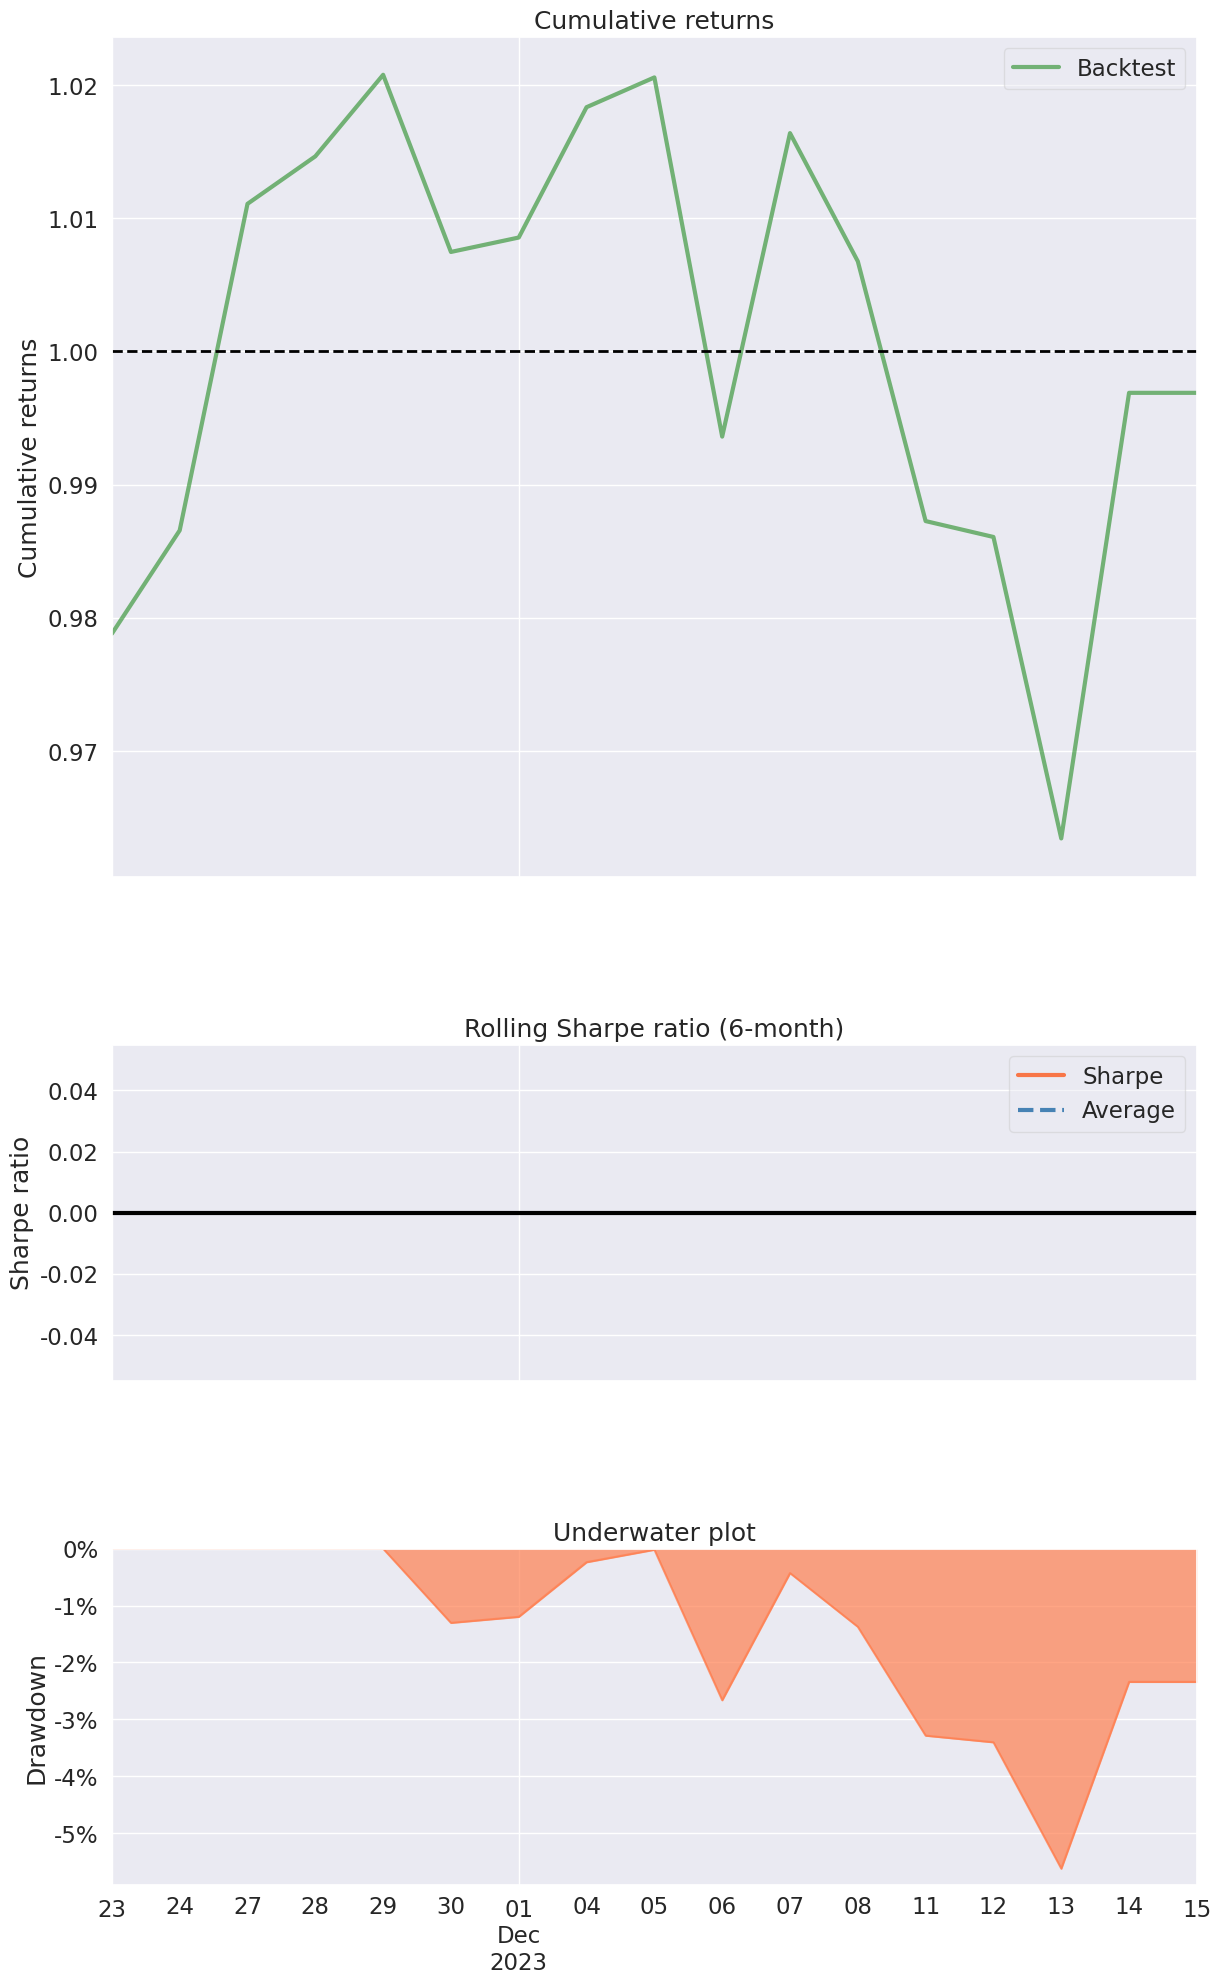

In [76]:
ShowTearSheet(OrderedTimeSeries['pct_change'].dropna(), YAHOO_PF_FILE)

In [77]:
import pyfolio as pf
pystats_df = pf.timeseries.perf_stats(OrderedTimeSeries['pct_change'].dropna())
max_drawdown = np.abs(100*pf.timeseries.max_drawdown(OrderedTimeSeries['pct_change'].dropna()))
annual_return = pf.timeseries.annual_return(OrderedTimeSeries['pct_change'].dropna())
sharpe_ratio = pf.timeseries.sharpe_ratio(OrderedTimeSeries['pct_change'].dropna())
print("CURRENT PORTFOLIO PERFORMANCE")
pystats_df

CURRENT PORTFOLIO PERFORMANCE


/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
<ipython-input-77-97d2e39f3402>:3: DeprecationWarning: Risk functions in pyfolio.timeseries are deprecated and will be removed in a future release. Please install the empyrical package instead.
  max_drawdown = np.abs(100*pf.timeseries.max_drawdown(OrderedTimeSeries['pct_change'].dropna()))
<ipython-input-77-97d2e39f3402>:4: DeprecationWarning: Risk functions in pyfolio.timeseries are deprecated and will be removed in a future release. Please install the empyrical package instead.
  annual_return = pf.timeseries.annual_return(OrderedTimeSeries['pct_change'].dropna())
<ipython-input-77-97d2e39f3402>:5: DeprecationWarning: Risk functions in pyfolio.timeseries are deprecated and will be removed in a future release. Please install the empyrical

Annual return         -0.045072
Cumulative returns    -0.003106
Annual volatility      0.277158
Sharpe ratio          -0.036298
Calmar ratio          -0.801993
Stability              0.071619
Max drawdown          -0.056200
Omega ratio            0.994032
Sortino ratio         -0.054330
Skew                   0.256645
Kurtosis              -0.654472
Tail ratio             1.134457
Daily value at risk   -0.034959
dtype: float64

In [78]:
IDEAL_PF

,Quantity,Purchase Price,Purchased Value,Current Price,Market Value,Start PF %,End PF %,PnL %,Purchase Amount,End Quantity,Portfolio_Weights,InitialPrices,FinalPrices,Portfolio_Amounts,Portfolio_Shares
Symbol,,,,,,,,,,,,,,,
SISE.IS,775.0,40.552,37562.35,48.48,36311.52,43.97,43.02,-3.98,37572.0,775.0,0.438856,50.15,48.48,37572.003192,749
TUPRS.IS,170.0,99.143,25674.0,151.20,24948.00,30.05,29.56,-4.31,25704.0,170.0,0.300233,155.6,151.2,25704.001839,165
KCHOL.IS,36.0,144.011,5316.9,148.00,5476.00,6.22,6.49,3.07,5327.0,35.0,0.062233,143.7,148.0,5327.997863,37
EREGL.IS,113.0,39.023,4725.84,41.90,4860.40,5.53,5.76,3.05,4734.0,112.0,0.055303,40.74,41.9,4734.695823,116
ISCTR.IS,194.0,17.798,4727.6,24.38,5436.74,5.53,6.44,20.54,4729.0,193.0,0.055245,21.2,24.38,4729.721675,223
KONTR.IS,13.0,177.608,2760.0,215.00,2150.00,3.23,2.55,-26.42,2795.0,13.0,0.032647,276.0,215.0,2795.000536,10
FORTE.IS,30.0,12.120,1887.5,65.10,1627.50,2.21,1.93,-71.51,1952.0,29.0,0.022812,75.5,65.1,1952.999636,25
BINHO.IS,4.0,125.000,1164.1,295.00,2065.00,1.36,2.45,180.18,1180.0,4.0,0.013783,166.3,295.0,1180.003274,7
AGROT.IS,75.0,5.210,962.64,12.85,NaN,1.13,NaN,NaN,963.0,74.0,0.011257,5.73,NaN,963.751957,168


In [79]:


# A function to generate the avg return, risk and the sharpe ratio of the portfolio
# correponding to the weight array passed
def portfolio_stats(weight):

    # Convert to array in case list was passed instead.
    weight = np.array(weight)
    port_return = np.sum(log_returns.mean() * weight) * 252
    #port_return = log_returns.mean() * weight
    port_risk = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov() * 252, weight)))
    #port_risk = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov() * 252, weight))) / np.sqrt(252)
    sharpe = (port_return - risk_free_rate)/port_risk

    return {'return': port_return, 'risk': port_risk, 'sharpe': sharpe}

In [80]:
def EvaluatePortfolio(weight):

    pf_stats = portfolio_stats(weight)
    pf_return = pf_stats['return']
    pf_risk = pf_stats['risk']
    pf_sharpe = pf_stats['sharpe']
    return pf_stats




In [81]:

def Monte_Carlo(iterations):
    portfolio_returns = []
    portfolio_risks = []
    for x in range (iterations):
        weight = RandWeights(length)
        pf_stats = portfolio_stats(weight)
        portfolio_returns.append(pf_stats['return'])
        portfolio_risks.append(pf_stats['risk'])

    portfolio_returns = np.array(portfolio_returns)
    portfolio_risks = np.array(portfolio_risks)
    return portfolio_returns, portfolio_risks


In [82]:
def OptimizationWithSharpeRatio():

    def FindNegSharpe(weight):
        return (-1)*portfolio_stats(weight)['sharpe']

    res = minimize(
          FindNegSharpe,
          RandWeights(length),
          method = 'SLSQP',
          constraints=[
            {'type': 'eq', 'fun': lambda w: np.sum(w) - 1.},
          ],
          bounds=[(P_BOUND_LO, P_BOUND_HI) for i in range(length)]
        )

    return res


In [83]:
def FindWeights():
    WEIGHT_HSR = portfolio_stats(Optimal_weights_For_Highest_Sharpe_Ratio)['return']
    STDDEV_HSR = portfolio_stats(Optimal_weights_For_Highest_Sharpe_Ratio)['risk']/np.sqrt(252)
    Optimal_weights_for_Percent_Returns = OptimizationForAGivenReturn(WEIGHT_HSR).x
    print(portfolio_stats(Optimal_weights_for_Percent_Returns))
    print(np.round(Optimal_weights_For_Highest_Sharpe_Ratio,4))
    return np.round(Optimal_weights_For_Highest_Sharpe_Ratio,4)

In [84]:
# A function for generating a numpy array containing random weights that add upto 1
def RandWeights(size):
    weight = np.random.dirichlet(alpha = np.ones(size))
    # BURAYA MAKSIMUM AGIRLIGIN %20 OLABILECEGI KOSULU EKLE
    return weight

In [85]:
exchange = "BIST30"

def AddToStockList(alist,item):
    a = []
    for i in alist:
        a.append(i)
    a.append(item)
    return (a)

def AddTRYXToStockList(sl):
    if exchange == "BIST500" or exchange == "BIST30":
        if 'TRY=X' not in sl:
            sl = AddToStockList(sl, 'TRY=X')
            return sl



In [86]:
stock_list = MYPF.index
stock_list = AddTRYXToStockList(stock_list)
stock_list

['SISE.IS',
 'TUPRS.IS',
 'KCHOL.IS',
 'EREGL.IS',
 'ISCTR.IS',
 'KONTR.IS',
 'BINHO.IS',
 'AGROT.IS',
 'FORTE.IS',
 'EKOS.IS',
 'TRY=X']

In [87]:


look_back = 93
BACKTEST_PERIOD = 93
FW_TEST_PERIOD = 93

from datetime import datetime, date, timedelta
import time
import yfinance as yf

start_time = datetime.now()

T0_START = ( date.today() - timedelta( days = look_back))
T0_END   = ( T0_START + timedelta( days = BACKTEST_PERIOD ))
T1_START = ( T0_END   + timedelta( days = 1 ))
T1_END   = ( T1_START + timedelta( days = FW_TEST_PERIOD ))

import yfinance as yf
'''
UTILITY U=020 : DOWNLOAD_ASSETS_&_WRITE_DF BY SELECTING WEEKDAY DATA ONLY
--------------------------------------------
- CHANGES WORKING DIRECTORY
- SET FLAG TO NEW_DOWNLOAD
- GETS DATA FOR ALL ASSETS IN stock_list FROM YAHOO FINANCE
- FILTERS WEEKEND DATA OUT
- WRITES DATA IN df and price_list
- WRITES DATA IN CSV FILES

DIKKAT: stock_list in dataframe degil list olmasi gerekli !!!

'''
def DownloadAssetsAndWriteToCSVs(stock_list):
    new_download = True
    price_list = []
    if new_download:
        print(LENGTH*"*")
        print(f"Starting Download of filtered {len(stock_list)} {exchange} assets")
        print(LENGTH*"*")
        for tick in stock_list:
            try:   # added 1/07/22
                print(f"Downloading {tick}")
                yf_tick = yf.Ticker(tick)
                df = yf_tick.history(interval='1d', auto_adjust=True, start=T0_START, end=T0_END, back_adjust = True, rounding=True)
                #df = web.DataReader(tick, "yahoo", T0_START, T0_END)["Adj Close"]
                df['Close'] = df['Close'].mask( (tick == "XU100.IS" or tick == "XU030.IS") & (df['Close'] > 10000), other = df['Close'] / 100.0)
                df.dropna(how='all', inplace=True)
                price_list.append(df)
            except Exception as e:    # added 1/07/22
                print(e, tick)        # added 1/07/22
        print(LENGTH*"*")
        print(f" DOWNLOADED {len(stock_list)} TICKERS from {exchange}")
        print(LENGTH*"*")

        # exclude weekends


        #df = df[df.index.dayofweek < 5]

        ## Save datafiles to disk

        for i,df in enumerate(price_list):
            df.to_csv(f"{stock_list[i]}.csv")



    # UTILITY U=021 : FETCH_ASSETS_FROM_CSV_FILES_&_WRITE_DF
    # --------------------------------------------
    # - CHANGES WORKING DIRECTORY
    # - SET FLAG TO NEW_DOWNLOAD
    # - GETS DATA FOR ALL ASSETS IN stock_list FROM CSV FILES
    # - PUTS DATA in df
    #


    else:
        price = {}
        print(LENGTH*"*")
        print("Fetching Downloaded CSV Files ...")
        print(LENGTH*"*")
        for tick in stock_list:
            print(f"Fetching {tick}")
            filename = f"{tick}.csv"
            df = pd.read_csv(filename)
            price[tick] = df
        print(LENGTH*"*")
        #print('Done ...Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))
        print(LENGTH*"*")




In [88]:
DownloadAssetsAndWriteToCSVs(stock_list)

****************************************************************
Starting Download of filtered 11 BIST30 assets
****************************************************************
****************************************************************
 DOWNLOADED 11 TICKERS from BIST30
****************************************************************


In [89]:
'''
UTILITY U=001A : CSV_MERGER_DATE_REVERSED
--------------------------------------------
- FUNCTION NAME: def CSV_2_DF_REV_ORDER()
- input: exhange name, stocklist
- output: sorted (DF)
- READS desired assets from csv files
- APPENDS the 'close' columns required in a single df name `li`
- SORTS dataframe in reversed order
- WRITES to csv file

'''

def MergeCSVFiles(stock_list):
    import pandas as pd
    import os

    pf_data = pd.DataFrame()
    li = pd.DataFrame() # my real portfolio dataframe
    rets = pd.DataFrame()
    names = []
    count = len(stock_list)

    #os.chdir(wd)
    #for file in sorted2.Stock:
    for file in stock_list:

        pf_data = pd.read_csv(f"{file}.csv", index_col='Date', parse_dates=True, keep_date_col = True, infer_datetime_format=True, dayfirst=True, decimal=",")
        li = pd.concat( [li,pf_data['Close']],axis=1) #, ignore_index=True)
        st_name = file.split('.',maxsplit = 1)
        names.append(st_name[0])

    li.columns = names

    #USDTRY CONVERSION


    li = li.rename_axis(index="Date")
    sorted = li.sort_values(by=['Date'], ascending=[False])
    # exclude weekends

    #sorted = sorted[sorted.index.dayofweek < 5]
    #sorted = omit_dates(sorted, omit_weekends=True)
    sorted.to_csv(f"{exchange}_Close.csv")

    print("CSV files merged")
    return(f"{exchange}_Close.csv")


csv = MergeCSVFiles(stock_list)

CSV files merged


In [90]:
def ReadMergedCSVToPfData(CSVfilename):
    pf_data=pd.read_csv(CSVfilename)
    pf_data.set_index("Date", inplace = True)
    pf_data = pf_data.sort_values(by=['Date'], ascending=[True])
    pf_data.dropna(inplace=True)
    return pf_data

In [91]:
pf_data = ReadMergedCSVToPfData(f"{exchange}_Close.csv")

In [92]:
def ConvertTimeseriesToUSD(PFDATA):
    if exchange == "BIST500" or exchange == "BIST30" :
        new_names = []
        for i in stock_list:
            sl = i.split('.',maxsplit = 1)
            new_names.append(sl[0])
        for i in new_names:
            if i != 'GC=F' and i != 'CL=F':
                PFDATA[i] = pd.Series(PFDATA[i] / PFDATA['TRY=X'])
        return PFDATA

pf_data = ConvertTimeseriesToUSD(pf_data)

In [93]:
# def DrawSelectedAssetsPerformance(pf_data):
#     from PIL import Image as im
#     fig = plt.figure(dpi=250) # plt.figure()
#     #(pf_data[Metals]/pf_data[Metals].iloc[0]).plot(figsize = (15,30))
#     (pf_data/pf_data.iloc[-pf_data.shape[0]]).tail(pf_data.shape[0]).plot(figsize = (15,10))
#     plt.grid(True)
#     plt.title(f"Seçilen {exchange} hisselerinin son {pf_data.shape[0]} günü ")
#     plt.savefig("Fig_001_BIST30_Selected.jpg", format='jpg', dpi=300)
#     from IPython.display import Image
#     Image(url="Fig_001_BIST30_Selected.jpg")


# DrawSelectedAssetsPerformance(pf_data)

In [94]:
def ConvertTimeSeriesToReturns(pf_data):

    log_returns = np.log(pf_data/pf_data.shift(1))
    return log_returns

log_returns = ConvertTimeSeriesToReturns(pf_data)

In [95]:

def CalculateRandomWeights():
    length = len(log_returns.columns)
    weight = RandWeights(length)
    return length, weight

length, weight = CalculateRandomWeights()

In [96]:
P_BOUND_LO = 0
P_BOUND_HI = 1
risk_free_rate  = 0.25

from scipy.optimize import minimize
Optimal_weights_For_Highest_Sharpe_Ratio = OptimizationWithSharpeRatio().x
Optimal_weights_For_Highest_Sharpe_Ratio

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:10474: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid val

array([0.10350773, 0.17502478, 0.24082871, 0.00069264, 0.06970431,
       0.00130845, 0.10920792, 0.01676681, 0.15051855, 0.12584903,
       0.00659107])

In [97]:

def OptimizationForAGivenReturn(target_return):

    def fun(weight):
        pf_stats = portfolio_stats(weight)
        _risk = pf_stats['risk']
        return _risk

    res = minimize(
      fun,
      RandWeights(length),
      method = 'SLSQP',
      constraints=[{'type':'eq','fun': lambda x: portfolio_stats(x)['return']-target_return},
                   {'type':'eq','fun': lambda x: np.sum(x)-1}],
      bounds=[(P_BOUND_LO, P_BOUND_HI) for i in range(length)]
    )

    return res


In [98]:
Optimal_weights_for_Percent_Returns = FindWeights()

{'return': 0.0, 'risk': nan, 'sharpe': nan}
[0.1035 0.175  0.2408 0.0007 0.0697 0.0013 0.1092 0.0168 0.1505 0.1258
 0.0066]


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:10474: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid val

In [99]:
currency        = "TL"

w = np.round(Optimal_weights_For_Highest_Sharpe_Ratio,4)

def OptimizeWeights(w,stock_list):

    BEST_PF = pd.Series(w*100, stock_list)
    print("% weights of BEST PF")
    index = w>=0.01
    a = pd.DataFrame(BEST_PF[index].round(3),  columns=['%'] )
    Portfolio_Weights = w[index].round(4)
    Portfolio_Assets = BEST_PF[index]
    Portfolio_Amounts = Portfolio_Weights*CURRENT_T2
    a[f"Amount in {CURRENT_T2} {currency}"] = np.round(Portfolio_Amounts,2)
    pf_stats = portfolio_stats(Optimal_weights_For_Highest_Sharpe_Ratio)
    print(portfolio_stats(Optimal_weights_For_Highest_Sharpe_Ratio))
    a.sort_values(by=['%'], ascending=[False], inplace = True)
    print(a[f"Amount in {CURRENT_T2} {currency}"])
    return a

Final_TEFAS_PF = OptimizeWeights(Optimal_weights_For_Highest_Sharpe_Ratio, stock_list)





% weights of BEST PF
{'return': 0.0, 'risk': nan, 'sharpe': nan}
KCHOL.IS    20615.75
TUPRS.IS    14982.37
FORTE.IS    12884.84
EKOS.IS     10770.19
BINHO.IS     9349.00
SISE.IS      8861.00
ISCTR.IS     5967.27
AGROT.IS     1438.31
Name: Amount in 85613.56999999999 TL, dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:10474: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid val

In [100]:
fn =  f"Best_PF_For_{EXCHANGE}.csv"
print("making operation with ",fn)
Array_BESTPF_weights = np.array(pd.read_csv(f"Best_PF_For_{EXCHANGE}.csv")['End PF %']/100)
assets = pd.read_csv(f"Best_PF_For_{EXCHANGE}.csv")['assets']
Markowitz_PF = pd.read_csv(f"Best_PF_For_{EXCHANGE}.csv")
Markowitz_Weights = OptimizeWeights(Array_BESTPF_weights, assets)

making operation with  Best_PF_For_bist30.csv
% weights of BEST PF
{'return': 0.0, 'risk': nan, 'sharpe': nan}
assets
TUPRS.IS    66966.93
PGSUS.IS     7944.94
GARAN.IS     7893.57
GUBRF.IS     2799.56
Name: Amount in 85613.56999999999 TL, dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:10474: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid val

In [101]:
Markowitz_PF

,Unnamed: 0,assets,%,Amount,buy_price,shares_to_buy,Portfolio_Weights,InitialPrices,FinalPrices,Portfolio_Amounts,Portfolio_Shares,Purchased Value,Market Value,PnL %,Start PF %,End PF %,Final_Cost,Rebalance Buy Price,Rebalance Shares
0,22,TUPRS.IS,73.58,77994.8,139.00,561.0,0.7358,101.80,139.00,77994.8,766,77978.8,106474.0,36.54,73.94,78.22,82913.2,139.00,561.0
1,23,PGSUS.IS,11.06,11723.6,902.50,12.0,0.1106,821.00,902.50,11723.6,14,11494.0,12635.0,9.93,10.90,9.28,9836.8,902.50,12.0
2,17,GARAN.IS,10.97,11628.2,49.24,236.0,0.1097,45.58,49.24,11628.2,255,11622.9,12556.2,8.03,11.02,9.22,9773.2,49.24,236.0
3,11,GUBRF.IS,4.38,4642.8,317.80,14.0,0.0438,311.90,317.80,4642.8,14,4366.6,4449.2,1.89,4.14,3.27,3466.2,317.80,14.0


In [102]:
Ideal_PF_Weights = Markowitz_Weights['%']
Ideal_PF_Weights

assets
TUPRS.IS    78.22
PGSUS.IS     9.28
GARAN.IS     9.22
GUBRF.IS     3.27
Name: %, dtype: float64

In [103]:
np.round(Markowitz_Weights,2)

,%,Amount in 85613.56999999999 TL
assets,,
TUPRS.IS,78.22,66966.93
PGSUS.IS,9.28,7944.94
GARAN.IS,9.22,7893.57
GUBRF.IS,3.27,2799.56


In [104]:
'''
UTILITY U=022 : COMPARE_TWO_PORTFOLIOS_AND_CREATE_SHOPPING_LIST
----------------------------------------------------------------
- READS TWO PORTFOLIOS as DICTIONARY
- CREATES SHOPPING_LIST dictionary for as difference
'''
#if FW_TEST_PERIOD > FW_TEST_LIMIT:
WAS = np.round(MYPF['End PF %']/100*CURRENT_T2,2)

# WAS_DICT = np.round(WAS.T.iloc[-1],2).to_dict()
WAS_DICT = { k.replace('.IS', ''): v for k, v in WAS.items() }
WAS_DICT

#sum = sum(WAS_DICT.values())
WILL = np.round(Ideal_PF_Weights/100*CURRENT_T2,2)
WILL_DICT = { k.replace('.IS', ''): v for k, v in WILL.items() }
WILL_DICT

SHOPPING_LIST = {}
for key in WAS_DICT.keys():
    if key in WILL_DICT:
        SHOPPING_LIST[key] = np.round(WILL_DICT[key] - WAS_DICT[key],2)

for key in WAS_DICT.keys():
    if key in WAS_DICT and not key in WILL_DICT:
        SHOPPING_LIST[key] = -np.round(WAS_DICT[key],2)

for key in WILL_DICT.keys():
    if not key in WAS_DICT and key in WILL_DICT:
        SHOPPING_LIST[key] = np.round(WILL_DICT[key],2)

print(SHOPPING_LIST)

ShoppingList = pd.DataFrame.from_dict(SHOPPING_LIST, orient ='index')

ShoppingList.rename(columns={0: 'Buy/Sell'}, inplace=True)
print("Shopping List for persistent Markowitz portfolio, as for tomorrow:")
print("------------------------------------------------------------------")
print(ShoppingList)

#ShoppingList = pd.DataFrame({"Buy-Sell":pd.DataFrame([SHOPPING_LIST]).T})
#ShoppingList.to_csv(SHOPPING_LIST_FILE)


#ShoppingList['shares']=np.trunc((ShoppingList['Buy/Sell'].values / Markowitz_PF['Rebalance Buy Price'].values))

#Markowitz_PF['new'] = ShoppingList['shares']
print(Markowitz_PF)

{'TUPRS': 41262.93, 'SISE': -37572.0, 'KCHOL': -5328.0, 'EREGL': -4734.7, 'ISCTR': -4729.72, 'KONTR': -2795.0, 'BINHO': -1180.0, 'AGROT': -963.75, 'FORTE': -1953.0, 'EKOS': -653.4, 'PGSUS': 7944.94, 'GARAN': 7893.57, 'GUBRF': 2799.56}
Shopping List for persistent Markowitz portfolio, as for tomorrow:
------------------------------------------------------------------
       Buy/Sell
TUPRS  41262.93
SISE  -37572.00
KCHOL  -5328.00
EREGL  -4734.70
ISCTR  -4729.72
KONTR  -2795.00
BINHO  -1180.00
AGROT   -963.75
FORTE  -1953.00
EKOS    -653.40
PGSUS   7944.94
GARAN   7893.57
GUBRF   2799.56
   Unnamed: 0    assets      %   Amount  buy_price  shares_to_buy  \
0          22  TUPRS.IS  73.58  77994.8     139.00          561.0   
1          23  PGSUS.IS  11.06  11723.6     902.50           12.0   
2          17  GARAN.IS  10.97  11628.2      49.24          236.0   
3          11  GUBRF.IS   4.38   4642.8     317.80           14.0   

   Portfolio_Weights  InitialPrices  FinalPrices  Portfolio_A